In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### Задание 1. 
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def ridge_err(y, y_pred, L, W):
    err = np.mean((y - y_pred)**2 + L * np.dot(W.T, W))
    return err

In [4]:
def cost_history(alpha, n_iter, gd_type='gd', reg = 'lr'):
    W = np.ones(X.shape[1])
    cost_history = []
    for i in range(n_iter):
        if (reg == 'lr') and (gd_type == 'gd'):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred) 
            W -= (alpha * (1/n * 2 * np.dot(X.T,(y_pred - y))))
            
        elif (reg == 'lr') and (gd_type == 'sgd'):
            train_ind = np.random.randint(X.shape[0])
            y_pred = np.dot(X[train_ind], W)
            err = calc_mse(y[train_ind], y_pred)
            W -= (alpha * (1/n * 2 * np.dot(X[train_ind].T, (y_pred - y[train_ind]))))
            
        elif (reg == 'ridge') and (gd_type == 'gd'):             
            y_pred = np.dot(X, W)
            err = ridge_err(y, y_pred, L, W)
            W -= (alpha * (2/n * (np.dot(X.T,(y_pred - y)) + L * W)))
            
        elif (reg == 'ridge') and (gd_type == 'sgd'): 
            train_ind = np.random.randint(X.shape[0])
            y_pred = np.dot(X[train_ind], W)
            err = ridge_err(y[train_ind], y_pred, L, W)
            W -= (alpha * (2/n * (np.dot(X[train_ind].T, (y_pred - y[train_ind])) + L * W)))
            
        cost_history.append(err)
    return cost_history

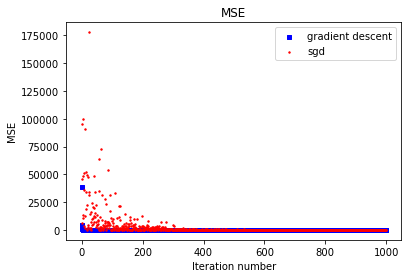

In [12]:
X, y = make_regression(n_samples=100, n_features=15)
n = X.shape[0]
alpha = 0.4
n_iter = 1000

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 'gd'), s=20, c='b', marker="s", label='gradient descent')
ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 'sgd'), s=2, c='r', marker="o", label='sgd')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='upper right');
plt.show()

Скорость сходимости стохастического градиентного спуска значительно ниже, чем у градиентного спуска

### Задание 2.
Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

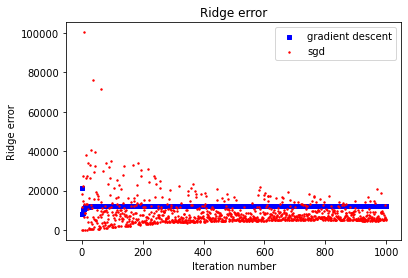

In [10]:
L = 0.5
alpha = 0.25
n_iter = 1000
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 'gd', 'ridge'), s=20, c='b', marker="s", label='gradient descent')
ax1.scatter(range(n_iter), cost_history(alpha, n_iter, 'sgd', 'ridge'), s=2, c='r', marker="o", label='sgd')

plt.title('Ridge error')
plt.xlabel('Iteration number')
plt.ylabel('Ridge error')
plt.legend(loc='upper right');
plt.show()

* Добавлениe L2 -регуляризации замедляет сходимость стохастического градиентного спуска значительно в большей степени, чем сходимость градиентного спуска.
* Чем выше L (lambda), тем ниже скорость сходимости стохастического градиентного спуска и выше разброс ошибки
* Для ускорения сходимости стохастического градиентного спуска при добавлении L2 -регуляризации скорость обуения (alpha) нужно скорректировать в сторону понижения.
* Eсли в ошибку суммировать веса, стохастический градиентный спуск часто показывет лучшие результаты по сравнению с градиентным спуском.